In [2]:
include("../analysis/mESC/load_analysis.jl");

E:\1_WORK\Caowenjie\CellCycle-RNAseq-main\analysis\mESC
Julia Version 1.10.4
Commit 48d4fd4843 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 16 × Intel(R) Core(TM) i7-10700 CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, skylake)
Threads: 1 default, 0 interactive, 1 GC (on 16 virtual cores)
Environment:
  JULIA_DEPOT_PATH = E:\Cache\julia

1333 cells in G1
2240 cells in S
2113 cells in G2M


sys:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead


Cut off 392 cells in G1
Considering 3882 genes out of 11544 in total
3054 cells in the merged (G1 + G2M) dataset
Shared genes: 1669


# Fig. 3A: counts versus lambda

In [3]:
cv3 = colorant"#57C6FF"
cv3_2 = colorant"#33a4df"
cv2 = colorant"#9881FD"
cv1 = c1;

In [4]:
function linear_regression(x, y)
    X = [ones(eltype(x), length(x)) x]
    beta = X \ y
    y_pred = X*beta
    beta, y_pred
end

linear_regression (generic function with 1 method)

In [5]:
f = Figure(size = (size_pt[1]*0.9, size_pt[2]*1.4), figure_padding=1)
ax = Axis(f[1, 1], xlabel="Extrinsic noise parameter λ=2ᶿ", ylabel="Spliced counts", 
          xticks=1:0.2:2)

x = 2 .^ theta
xth = sort(unique(x))
θs = sort(unique(theta))

ncells = 1000
ind = findfirst(gene_names .== "Rpl12")
y = counts_spliced[ind] 
mean_y = [mean(y[findall(th .== theta)]) for th in θs]
rinds = shuffle(1:length(y))[1:ncells]
scatter!(ax, x[rinds], y[rinds], color=(cv1, 0.35), markersize=3)
lines!(ax, xth, mean_y, color=(:black, 0.45), linewidth=0.8)
println(cor(x, y))
println(cor(x, y)^2)

ind = findfirst(gene_names .== "Malat1")
y = counts_spliced[ind] 
mean_y = [mean(y[findall(th .== theta)]) for th in θs]
rinds = shuffle(1:length(y))[1:ncells]
scatter!(ax, x[rinds], y[rinds], color=(cv2, 0.5), markersize=3)
lines!(ax, xth, mean_y, color=(:black, 0.45), linewidth=0.8)
beta, rsq = linear_regression(x, y)
println(cor(x, y))
println(cor(x, y)^2)

ind = findfirst(gene_names .== "Top2a")
y = counts_spliced[ind]
mean_y = [mean(y[findall(th .== theta)]) for th in θs]
rinds = shuffle(1:length(y))[1:ncells]
scatter!(ax, x[rinds], y[rinds], color=(cv3, 0.35), markersize=3)
lines!(ax, xth, mean_y, color=(:black, 0.45), linewidth=0.8)
println(cor(x, y))
println(cor(x, y)^2)

ylims!(ax, -2, 260)
xlims!(0.98, 2.01)

0.5784317978718146
0.33458334478921986
0.6200381529998622
0.38444731117548053
0.8110348911909572
0.6577775947291278


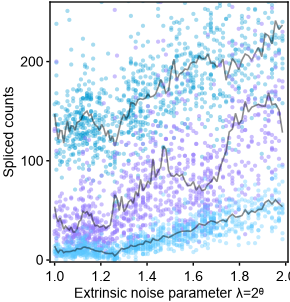

In [6]:
f

In [7]:
#save("../data/mESC/figures/3A_counts_vs_lambda.pdf", f, pt_per_unit = 1);

# Fig. 3B: linear regression to obtain $\beta$ for G1, S and G2/M

In [8]:
θs_G1 = sort(unique(thetaG1))
θs_S = sort(unique(thetaS))
θs_G2M = sort(unique(thetaG2M))

inds_θs_G1 = [findall(th .== thetaG1) for th in θs_G1]
inds_θs_S = [findall(th .== thetaS) for th in θs_S]
inds_θs_G2M = [findall(th .== thetaG2M) for th in θs_G2M]

_xG1 = log(2) .* θs_G1
_xS = log(2) .* θs_S
_xG2M = log(2) .* θs_G2M

θ_G1_f = maximum(thetaG1)
θ_S_i = minimum(thetaS)
θ_S_f = maximum(thetaS)
θ_G2M_i = minimum(thetaG2M)
θ_G1_S = θ_G1_f + (θ_S_i - θ_G1_f)/2
θ_S_G2M = θ_S_f + (θ_G2M_i - θ_S_f)/2;

In [9]:
function plot_counts(f::GridPosition, ind::Int)
    
    counts_G1 = [xG1[ind][_inds] for _inds in inds_θs_G1]
    counts_S = [xS[ind][_inds] for _inds in inds_θs_S]
    counts_G2M = [xG2M[ind][_inds] for _inds in inds_θs_G2M]
    
    yG1 = mean.(counts_G1)
    yS = mean.(counts_S)
    yG2M = mean.(counts_G2M)
    
    ax = Axis(f, xlabel="Extrinsic noise parameter λ", ylabel="Mean counts", xticks=(1:0.2:2), yticks=(6:4:14))
    vlines!(ax, 2^θ_G1_S, linewidth=0.9, color=(:black, 0.3), linestyle=:dash)
    vlines!(ax, 2^θ_S_G2M, linewidth=0.9, color=(:black, 0.3), linestyle=:dash)
    
    x = vcat(2 .^ θs_G1, 2 .^ θs_S, 2 .^ θs_G2M)
    y = vcat(yG1, yS, yG2M)
    lines!(ax, x, y, color=(c1, 0.3), linewidth=0.45, linestyle=:dash)
    scatter!(ax, x, y, color=(c1, 0.75), markersize=2.3)
    
    ylims!(ax, low=4, high=15)
    xlims!(ax, low=0.98, high=2.01)
    ax
end

plot_counts (generic function with 1 method)

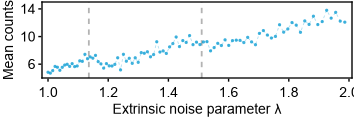

In [10]:
ind = findfirst(gene_names .== "Fn1")
f = Figure(size = (size_pt[1]*1.1, size_pt[2]*0.55), figure_padding = 1)
ax = plot_counts(f[1,1], ind)
f

In [11]:
#save("../data/mESC/figures/fig3b_example.pdf", f, pt_per_unit = 1);

In [12]:
function get_corr_G1(ind::Int)
    counts_G1 = [xG1[ind][_inds] for _inds in inds_θs_G1]
    mx_G1 = mean.(counts_G1)
    yG1 = log.(mx_G1)
    cor(_xG1, yG1)
end

function get_corr_S(ind::Int)
    counts_S = [xS[ind][_inds] for _inds in inds_θs_S]
    mx_S = mean.(counts_S)
    yS = log.(mx_S)
    cor(_xS, yS)
end

function get_corr_G2M(ind::Int)
    counts_G2M = [xG2M[ind][_inds] for _inds in inds_θs_G2M]
    mx_G2M = mean.(counts_G2M)
    yG2M = log.(mx_G2M)
    cor(_xG2M, yG2M)
end

get_corr_G2M (generic function with 1 method)

In [13]:
cx3 = colorant"#f07269"
cx2 = colorant"#8790fd"
cx1 = colorant"#0098D1";

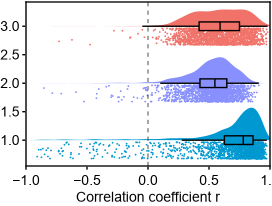

In [28]:
y1 = get_corr_G1.(1:ngenes); x1 = fill("G1", length(y1))
y2 = get_corr_S.(1:ngenes); x2 = fill("S", length(y2))
y3 = get_corr_G2M.(1:ngenes); x3 = fill("G2/M", length(y3));

f = Figure(size = (size_pt[1]*0.85, size_pt[2]*0.95), figure_padding = 1)
ax = Axis(f[1, 1]; xlabel="Correlation coefficient r", ylabel="")
rainclouds!(ax, vcat(x1, x2, x3), vcat(y1, y2, y3), gap=-0.9,
                orientation = :horizontal,
                color = vcat(fill(cx1, length(y1)), fill(cx2, length(y2)), fill(cx3, length(y3))),
                cloud_width=0.6, show_median=false, violin_limits=(-Inf, Inf), clouds=violin,
                boxplot_width=0.1, boxplot_nudge=0.0, strokewidth = 0.7, whiskerwidth=0,
                jitter_width=0.15, markersize=1.3, side_nudge=0.095)
vlines!(0, color=(:black, 0.5), linestyle=:dash)
xlims!(-1, 1)
f

In [20]:
#save("../data/mESC/figures/3B_r.pdf", f, pt_per_unit = 1);

In [21]:
function get_beta_lreg_G1(ind::Int)
    counts_G1 = [xG1[ind][_inds] for _inds in inds_θs_G1]
    mx_G1 = mean.(counts_G1)
    yG1 = log.(mx_G1)
    beta_G1, _ = linear_regression(_xG1, yG1)
    beta_G1[2]
end

function get_beta_lreg_S(ind::Int)
    counts_S = [xS[ind][_inds] for _inds in inds_θs_S]
    mx_S = mean.(counts_S)
    yS = log.(mx_S)
    beta_S, _ = linear_regression(_xS, yS)
    beta_S[2]
end

function get_beta_lreg_G2M(ind::Int)
    counts_G2M = [xG2M[ind][_inds] for _inds in inds_θs_G2M]
    mx_G2M = mean.(counts_G2M)
    yG2M = log.(mx_G2M)
    beta_G2M, _ = linear_regression(_xG2M, yG2M)
    beta_G2M[2]
end

get_beta_lreg_G2M (generic function with 1 method)

In [22]:
betas_G1_lreg = get_beta_lreg_G1.(1:ngenes)
betas_S_lreg = get_beta_lreg_S.(1:ngenes)
betas_G2M_lreg = get_beta_lreg_G2M.(1:ngenes);

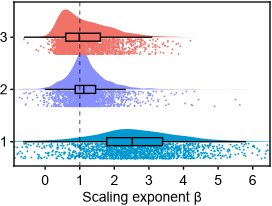

In [31]:
y1 = betas_G1_lreg; x1 = fill("G1", length(y1))
y2 = betas_S_lreg; x2 = fill("S", length(y2))
y3 = betas_G2M_lreg; x3 = fill("G2/M", length(y3));

f = Figure(size = (size_pt[1]*0.85, size_pt[2]*0.95), figure_padding = 1)
ax = Axis(f[1, 1]; xlabel="Scaling exponent β", ylabel="")
rainclouds!(ax, vcat(x1, x2, x3), vcat(y1, y2, y3), gap=-0.9,
                orientation = :horizontal,
                color = vcat(fill(cx1, length(y1)), fill(cx2, length(y2)), fill(cx3, length(y3))),
                cloud_width=0.8, show_median=false, violin_limits=(-Inf, Inf), clouds=violin,
                boxplot_width=0.1, boxplot_nudge=0.0, strokewidth = 0.7, whiskerwidth=0,
                jitter_width=0.15, markersize=1.3, side_nudge=0.095)
vlines!(1, color=(:black, 0.5), linestyle=:dash)
xlims!(-0.9, 6.5)
f

In [32]:
#save("../data/mESC/figures/3B_beta.pdf", f, pt_per_unit = 1);

# Fig. 3C: characterising $\beta$ values across cell-cycle phases

#### Remove genes with negative correlation

In [33]:
r1 = get_corr_G1.(1:ngenes)
r2 = get_corr_S.(1:ngenes)
r3 = get_corr_G2M.(1:ngenes);

In [34]:
rinds = union(findall(r1 .< 0), findall(r2 .< 0), findall(r3 .< 0))
inds = setdiff(1:ngenes, rinds)

xG1 = xG1[inds]
xS = xS[inds]
xG2M = xG2M[inds]
gene_names = gene_names[inds]

G1_th_dep_fits = G1_th_dep_fits[inds]
G2M_th_dep_fits = G2M_th_dep_fits[inds];
ngenes = length(inds)

println("Removed $(length(rinds)) genes with r < 0.")
println("$ngenes genes left remaining.")

Removed 132 genes with r < 0.
1537 genes left remaining.


In [35]:
function plot_betas_lreg(f::GridPosition, ind::Int)
    
    counts_G1 = [xG1[ind][_inds] for _inds in inds_θs_G1]
    counts_S = [xS[ind][_inds] for _inds in inds_θs_S]
    counts_G2M = [xG2M[ind][_inds] for _inds in inds_θs_G2M]
    
    mx_G1 = mean.(counts_G1)
    mx_S = mean.(counts_S)
    mx_G2M = mean.(counts_G2M)
    
    yG1 = log.(mx_G1)
    yS = log.(mx_S)
    yG2M = log.(mx_G2M)
    
    beta_G1, _ = linear_regression(_xG1, yG1)
    beta_S, _ = linear_regression(_xS, yS)
    beta_G2M, _ = linear_regression(_xG2M, yG2M)

    println("-------------------")
    println("MLE results:")
    β_G1_MLE = get_th_param(G1_th_dep_fits[ind])
    β_G2M_MLE = get_th_param(G2M_th_dep_fits[ind])
    println("G1: β = $β_G1_MLE")
    println("G2M: β = $β_G2M_MLE")
    println("-------------------")
    println("Linear regression results:")
    println("G1: β = $(beta_G1[2])")
    println("S: β = $(beta_S[2])")
    println("G2M: β = $(beta_G2M[2])")
    println("-------------------")
    
    ax = Axis(f, xlabel="log(λ)", ylabel="log(mean counts)", xticks=(0:0.2:0.6))
    vlines!(ax, θ_G1_S * log(2), linewidth=1.1, color=(:black, 0.3), linestyle=:dash)
    vlines!(ax, θ_S_G2M * log(2), linewidth=1.1, color=(:black, 0.3), linestyle=:dash)
    
    x = vcat(_xG1, _xS, _xG2M)
    y = vcat(yG1, yS, yG2M)
    lines!(ax, x, y, color=(c1, 0.3), linewidth=0.85, linestyle=:dash)
    scatter!(ax, x, y, color=(c1, 0.7), markersize=3)
    
    _x1 = vcat(_xG1, θ_G1_S * log(2))
    _y1 = beta_G1[1] .+ beta_G1[2] .* _x1
    _x2 = vcat(θ_G1_S * log(2), _xS, θ_S_G2M * log(2))
    _y2 = beta_S[1] .+ beta_S[2] .* _x2
    _x3 = vcat(θ_S_G2M * log(2), _xG2M)
    _y3 = beta_G2M[1] .+ beta_G2M[2] .* _x3
    _x = vcat(_x1, _x2, _x3)
    _y = vcat(_y1, _y2, _y3)
    
    lines!(ax, _x, _y, color=(c3, 0.8), linewidth=1.4)
    xlims!(ax, low=-0.02, high=0.7) 
    
    ax
end

plot_betas_lreg (generic function with 1 method)

Morf4l1
-------------------
MLE results:
G1: β = 2.9879895044515923
G2M: β = 1.9522446713805073
-------------------
Linear regression results:
G1: β = 2.9902051279419717
S: β = 1.4859272988478958
G2M: β = 1.9450017098900454
-------------------


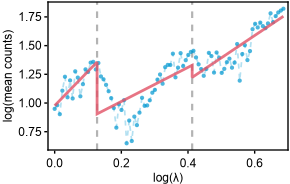

In [36]:
ind = rand(1:ngenes)
println(gene_names[ind])
f = Figure(size = (size_pt[1]*0.9, size_pt[2]*0.85), figure_padding = 1, fontsize=6)
ax = plot_betas_lreg(f[1,1], ind)
f

In [37]:
betas_G1_lreg = get_beta_lreg_G1.(1:ngenes)
betas_S_lreg = get_beta_lreg_S.(1:ngenes)
betas_G2M_lreg = get_beta_lreg_G2M.(1:ngenes);

In [38]:
inds1 = findall(betas_G1_lreg .<= betas_S_lreg .<= betas_G2M_lreg)
inds2 = findall(betas_G1_lreg .<= betas_G2M_lreg .<= betas_S_lreg)
inds3 = findall(betas_S_lreg .<= betas_G1_lreg .<= betas_G2M_lreg)
inds4 = findall(betas_S_lreg .<= betas_G2M_lreg .<= betas_G1_lreg)
inds5 = findall(betas_G2M_lreg .<= betas_G1_lreg .<= betas_S_lreg)
inds6 = findall(betas_G2M_lreg .<= betas_S_lreg .<= betas_G1_lreg);

In [39]:
@show length(inds1)
@show length(inds2)
@show length(inds3)
@show length(inds4)
@show length(inds5)
@show length(inds6);

length(inds1) = 43
length(inds2) = 54
length(inds3) = 33
length(inds4) = 565
length(inds5) = 70
length(inds6) = 772


In [40]:
x1 = round(length(inds1) / ngenes * 100, digits=1)
x2 = round(length(inds2) / ngenes * 100, digits=1)
x3 = round(length(inds3) / ngenes * 100, digits=1)
x4 = round(length(inds4) / ngenes * 100, digits=1)
x5 = round(length(inds5) / ngenes * 100, digits=1)
x6 = round(length(inds6) / ngenes * 100, digits=1)
@show x1
@show x2
@show x3
@show x4
@show x5
@show x6;

x1 = 2.8
x2 = 3.5
x3 = 2.1
x4 = 36.8
x5 = 4.6
x6 = 50.2


In [41]:
x6, x4, x5, x2, x1, x3

(50.2, 36.8, 4.6, 3.5, 2.8, 2.1)

In [42]:
f = Figure(size = (size_pt[1]*2.8, size_pt[2]*1.4), figure_padding = 1, fontsize=7)
ga = f[1,1] = GridLayout()

#(1,1) = inds6
#(1,2) = inds4
#(1,3) = inds5
#(2,1) = inds2
#(2,2) = inds1
#(2,3) = inds3

ind = findfirst(gene_names .== "Dtymk")
println(gene_names[ind])
ax11 = plot_betas_lreg(ga[1,1], ind)
ax11.xlabel = ""
ax11.xticksvisible = false
ax11.xticklabelsvisible = false

ind = findfirst(gene_names .== "Lefty2")
println(gene_names[ind])
ax21 = plot_betas_lreg(ga[2,1], ind)
ax21.xlabel = ""
ax21.ylabel = ""
ylims!(ax, high=1.9)

ind = findfirst(gene_names .== "Smap1")
println(gene_names[ind])
ax12 = plot_betas_lreg(ga[1,2], ind)
ax12.xlabel = ""
ax12.ylabel = ""
ax12.xticksvisible = false
ax12.xticklabelsvisible = false

ind = findfirst(gene_names .== "Sde2")
println(gene_names[ind])
ax22 = plot_betas_lreg(ga[2,2], ind)
ax22.ylabel = ""

ind = findfirst(gene_names .== "Rrp15")
println(gene_names[ind])
ax13 = plot_betas_lreg(ga[1,3], ind)
ax13.xlabel = ""
ax13.ylabel = ""
ax13.xticksvisible = false
ax13.xticklabelsvisible = false

ind = findfirst(gene_names .== "Iqgap1")
println(gene_names[ind])
ax23 = plot_betas_lreg(ga[2,3], ind)
ax23.xlabel = ""
ax23.ylabel = ""

colgap!(ga, 16)
rowgap!(ga, 16)

Dtymk
-------------------
MLE results:
G1: β = 3.2517577749325333
G2M: β = 0.7688015054447934
-------------------
Linear regression results:
G1: β = 3.001447451759953
S: β = 1.1023494049598699
G2M: β = 0.7434924393794635
-------------------
Lefty2
-------------------
MLE results:
G1: β = 2.06122776738545e-9
G2M: β = 1.2705897422589574
-------------------
Linear regression results:
G1: β = 0.14308153840652799
S: β = 3.210886097882748
G2M: β = 1.1308297745621372
-------------------
Smap1
-------------------
MLE results:
G1: β = 2.573758733059352
G2M: β = 1.1056687501531413
-------------------
Linear regression results:
G1: β = 2.076193125083613
S: β = 0.4800994478318211
G2M: β = 1.1034157781534795
-------------------
Sde2
-------------------
MLE results:
G1: β = 0.7339877166761143
G2M: β = 1.7102295245339991
-------------------
Linear regression results:
G1: β = 0.5497889164191686
S: β = 0.7564298615904791
G2M: β = 1.627991875541926
-------------------
Rrp15
-------------------
MLE resul

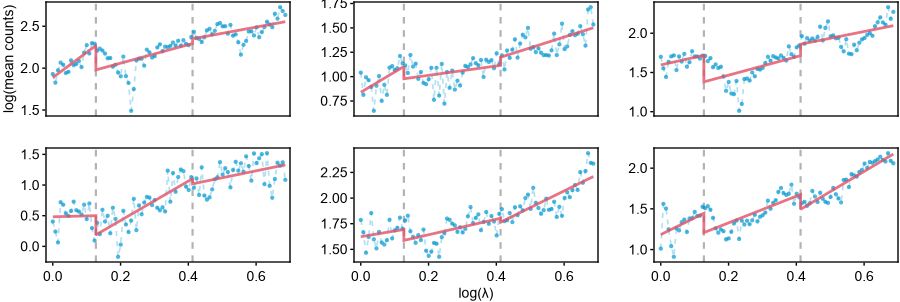

In [43]:
f

In [ ]:
#save("../data/mESC/figures/3C_betas.pdf", f, pt_per_unit = 1);